In [1]:
from keras.models import Sequential
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense, Embedding, SimpleRNN,LSTM
import matplotlib.pyplot as plt

Using TensorFlow backend.
/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [2]:
max_features = 10000  # number of words to consider as features（作为特征的单词个数）
maxlen = 500
batch_size = 32

(original_train, y_train), (original_test, y_test) = imdb.load_data(num_words=max_features)
print("Origainal data:")
print("original_train shape:", original_train.shape)
print("original_test shape:", original_train.shape)

input_train = sequence.pad_sequences(original_train, maxlen=maxlen)
input_test = sequence.pad_sequences(original_test, maxlen=maxlen)
print("Padding data:")
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Origainal data:
original_train shape: (25000,)
original_test shape: (25000,)
Padding data:
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [3]:
model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.6032 - acc: 0.6513 - val_loss: 0.4572 - val_acc: 0.8030

In [5]:
def draw_history(history) :
    plt.rcParams['font.sans-serif'] = ['SF Mono']
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams['savefig.dpi'] = 360  #图片像素
    plt.rcParams['figure.dpi'] = 360  #分辨率
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'b',color='red', label='Training acc')
    plt.plot(epochs, val_acc, 'b', color='blue',label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', color='red',label='Training loss')
    plt.plot(epochs, val_loss, 'b',color='blue', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  del sys.path[0]
/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  
/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and 

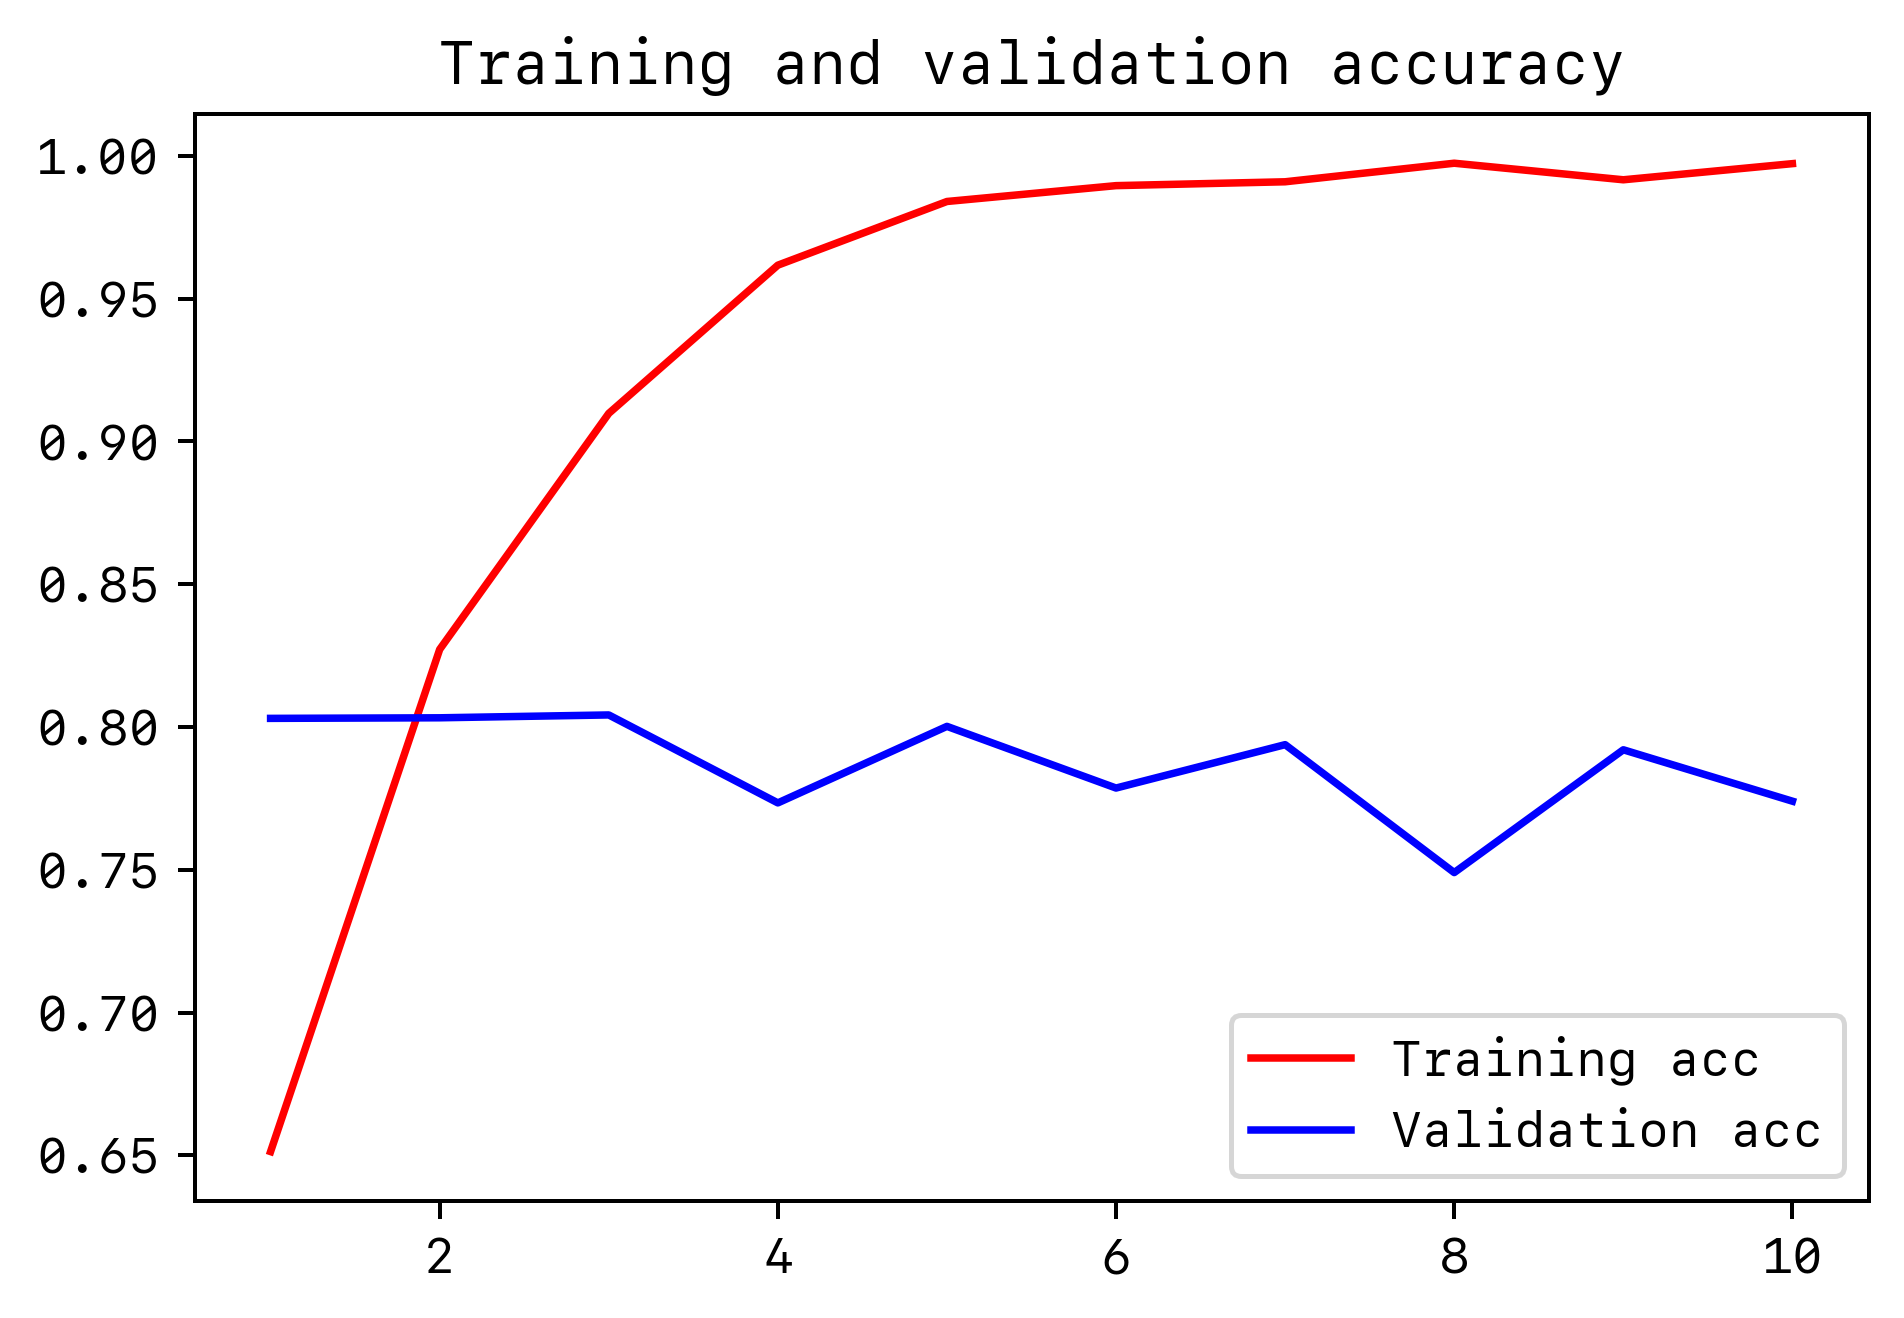

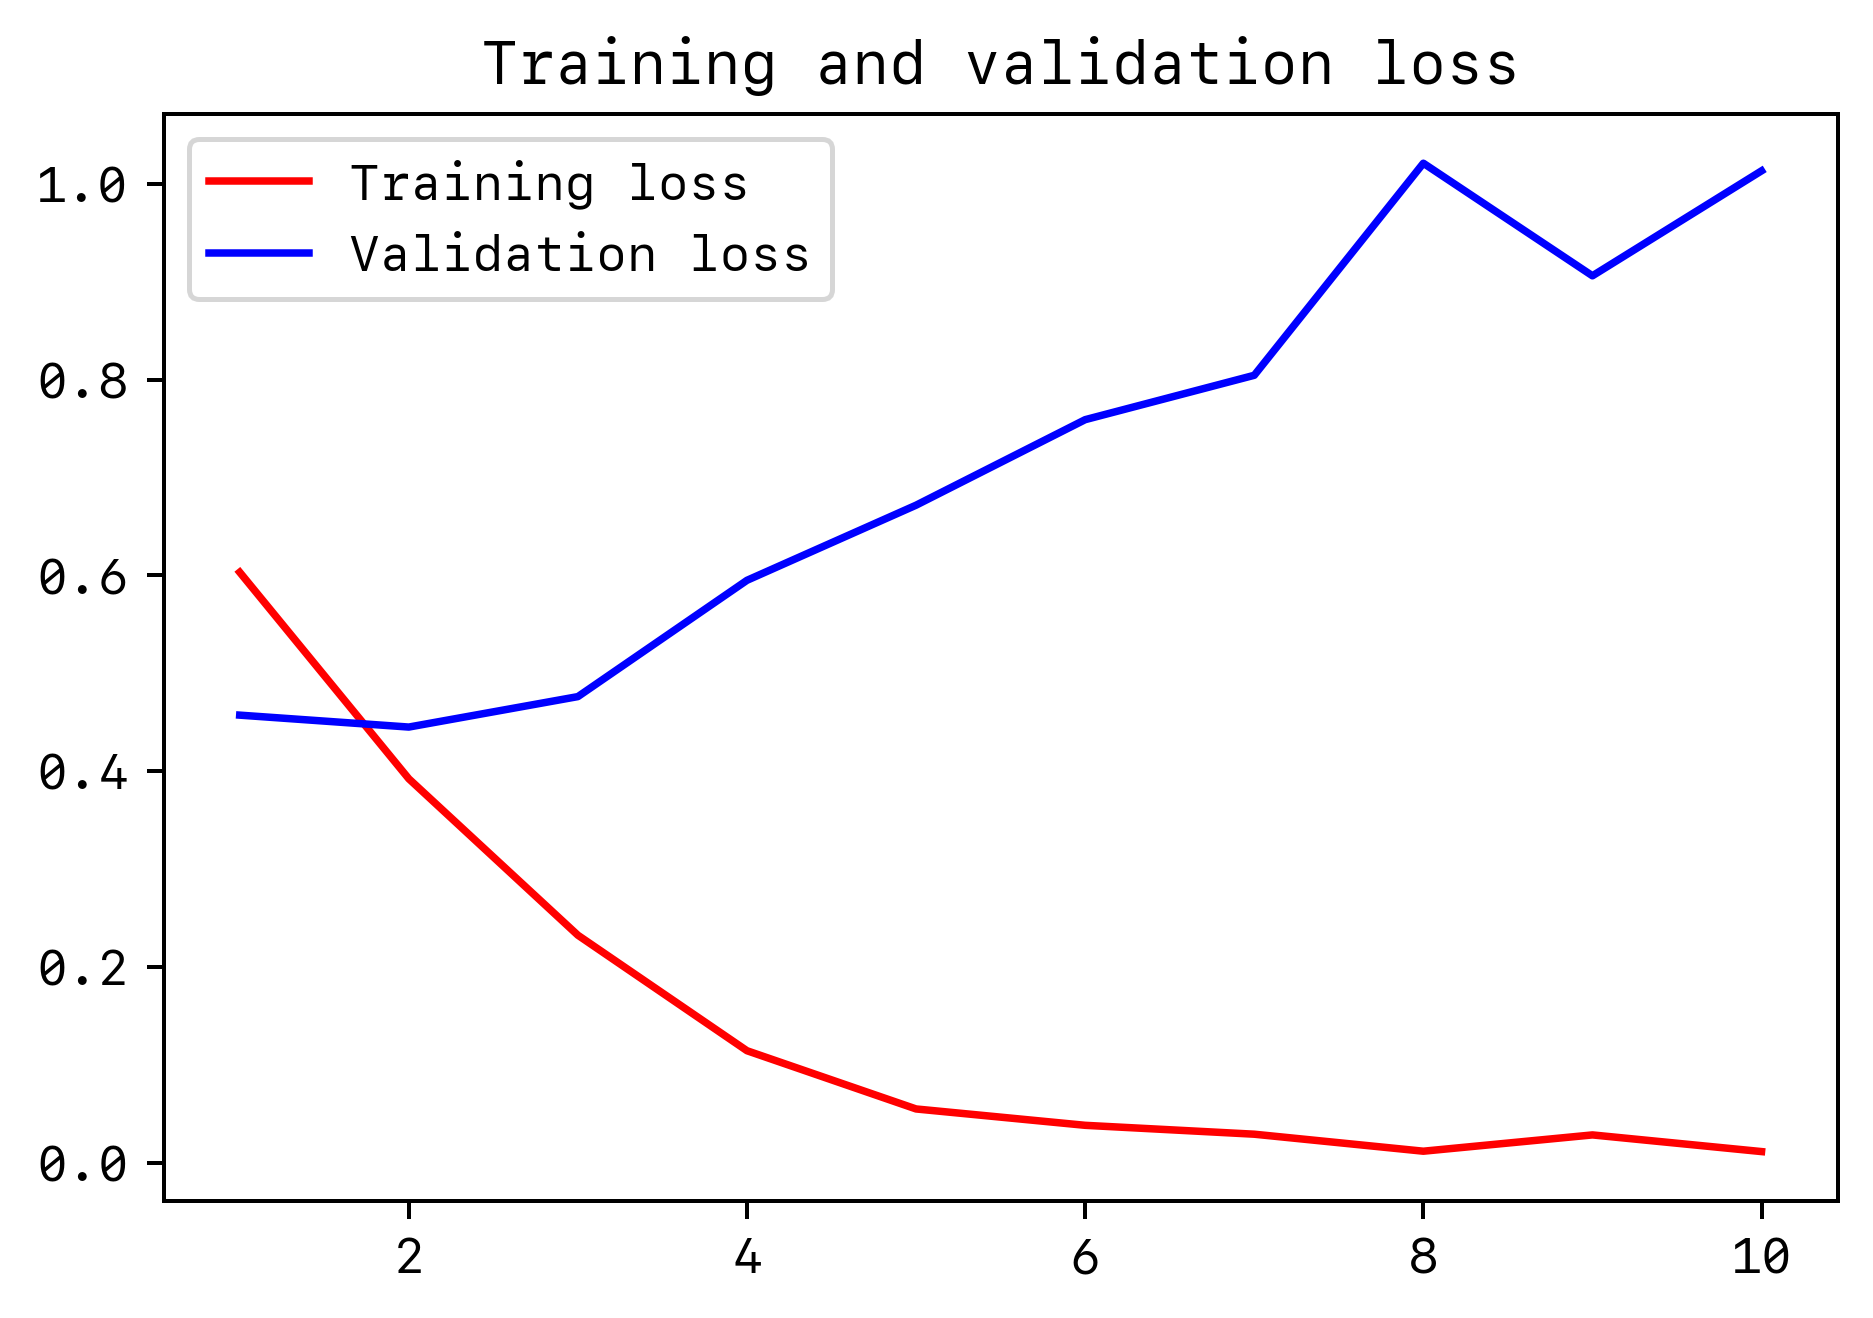

In [6]:
draw_history(history)

In [7]:
model=Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 211s 11ms/step - loss: 0.4351 - acc: 0.7950 - val_loss: 0.3218 - val_acc: 0.8788

/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  del sys.path[0]
/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  
/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
/Users/Bureaux/opt/miniconda3/envs/AI-base/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and 

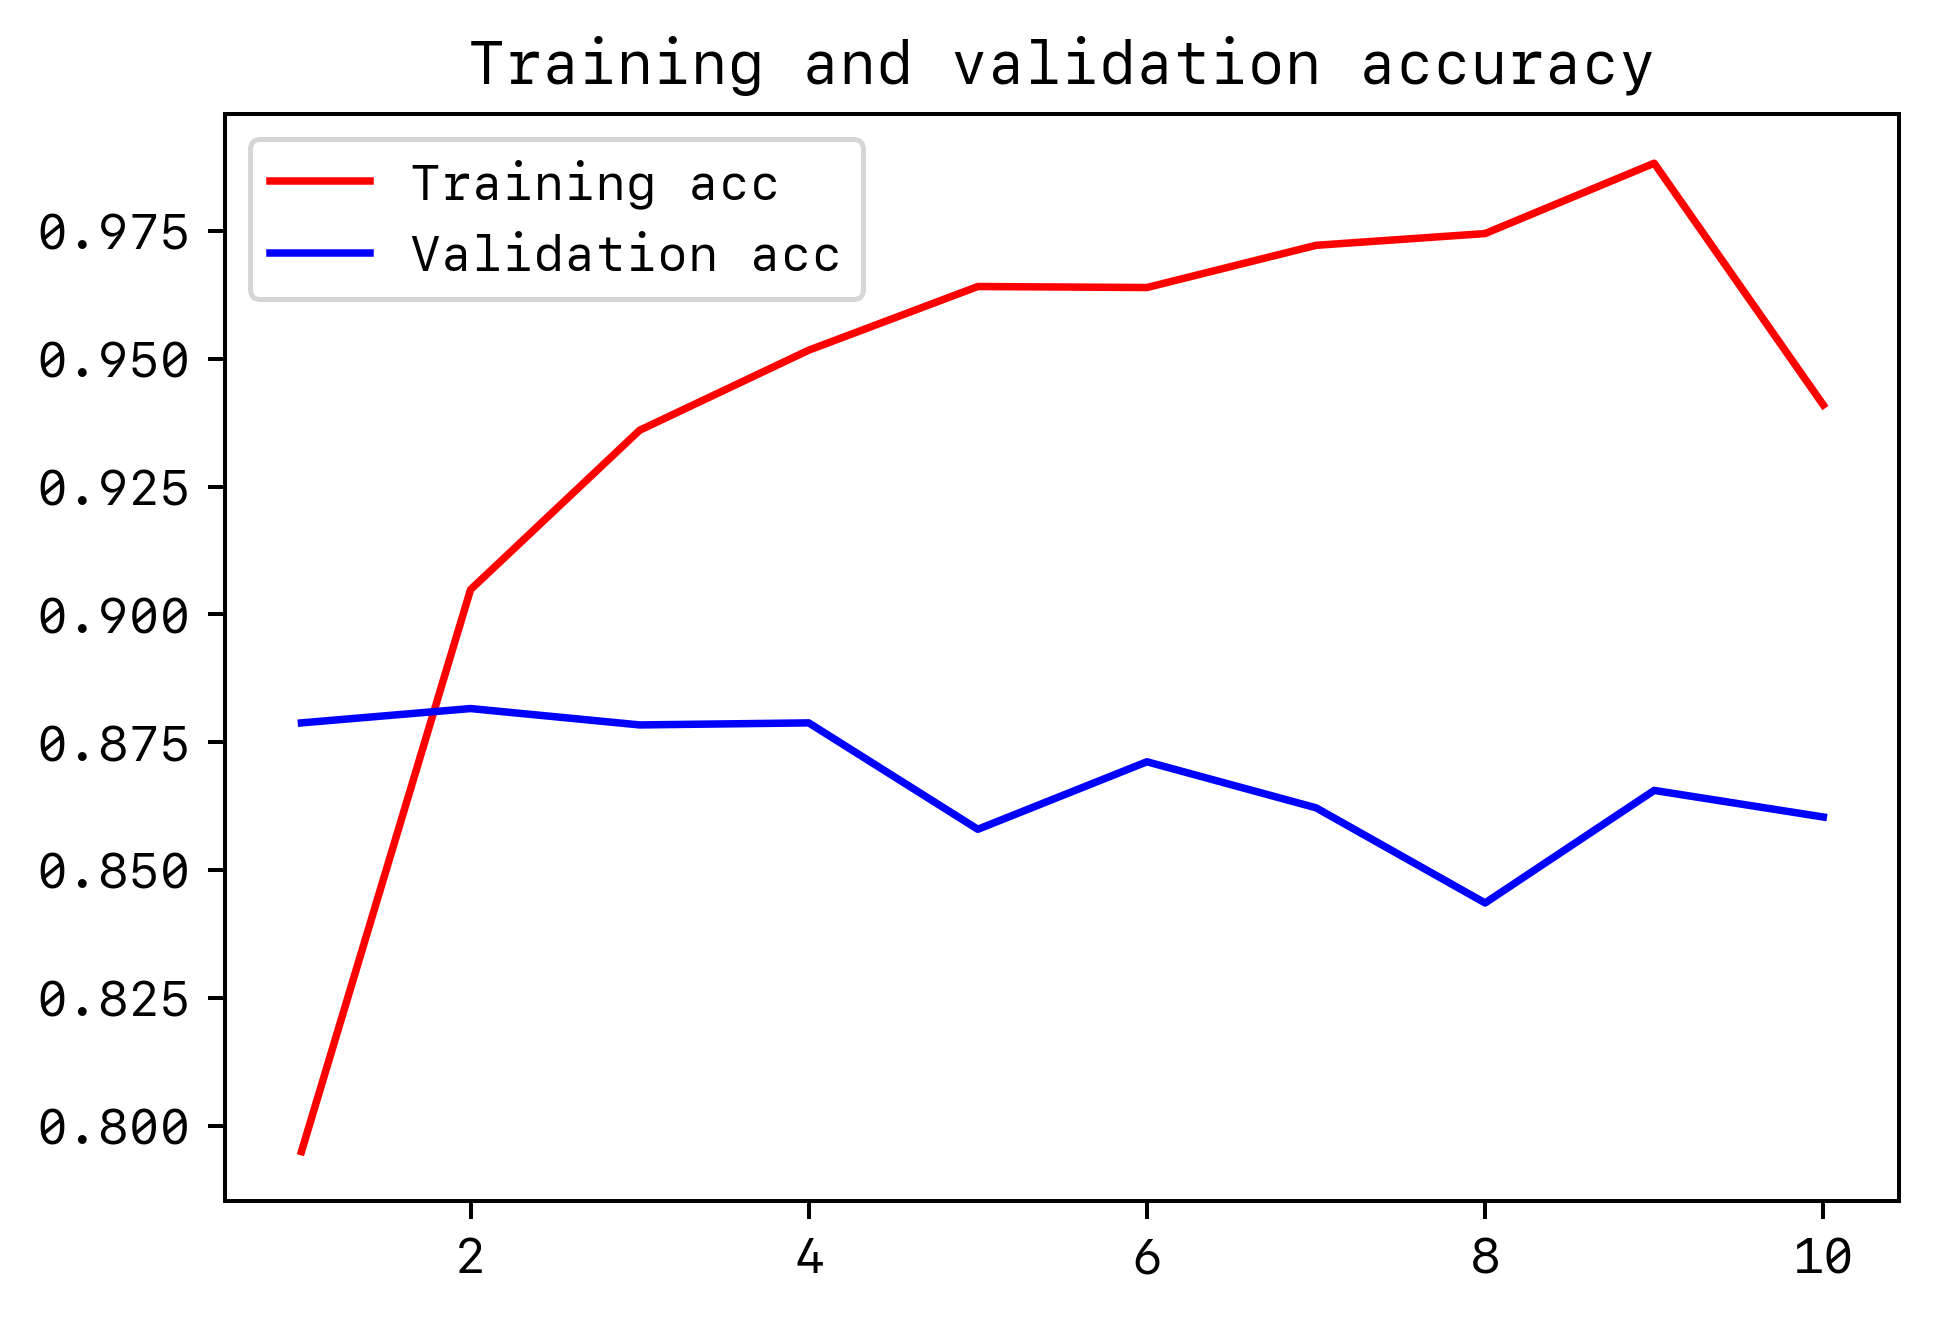

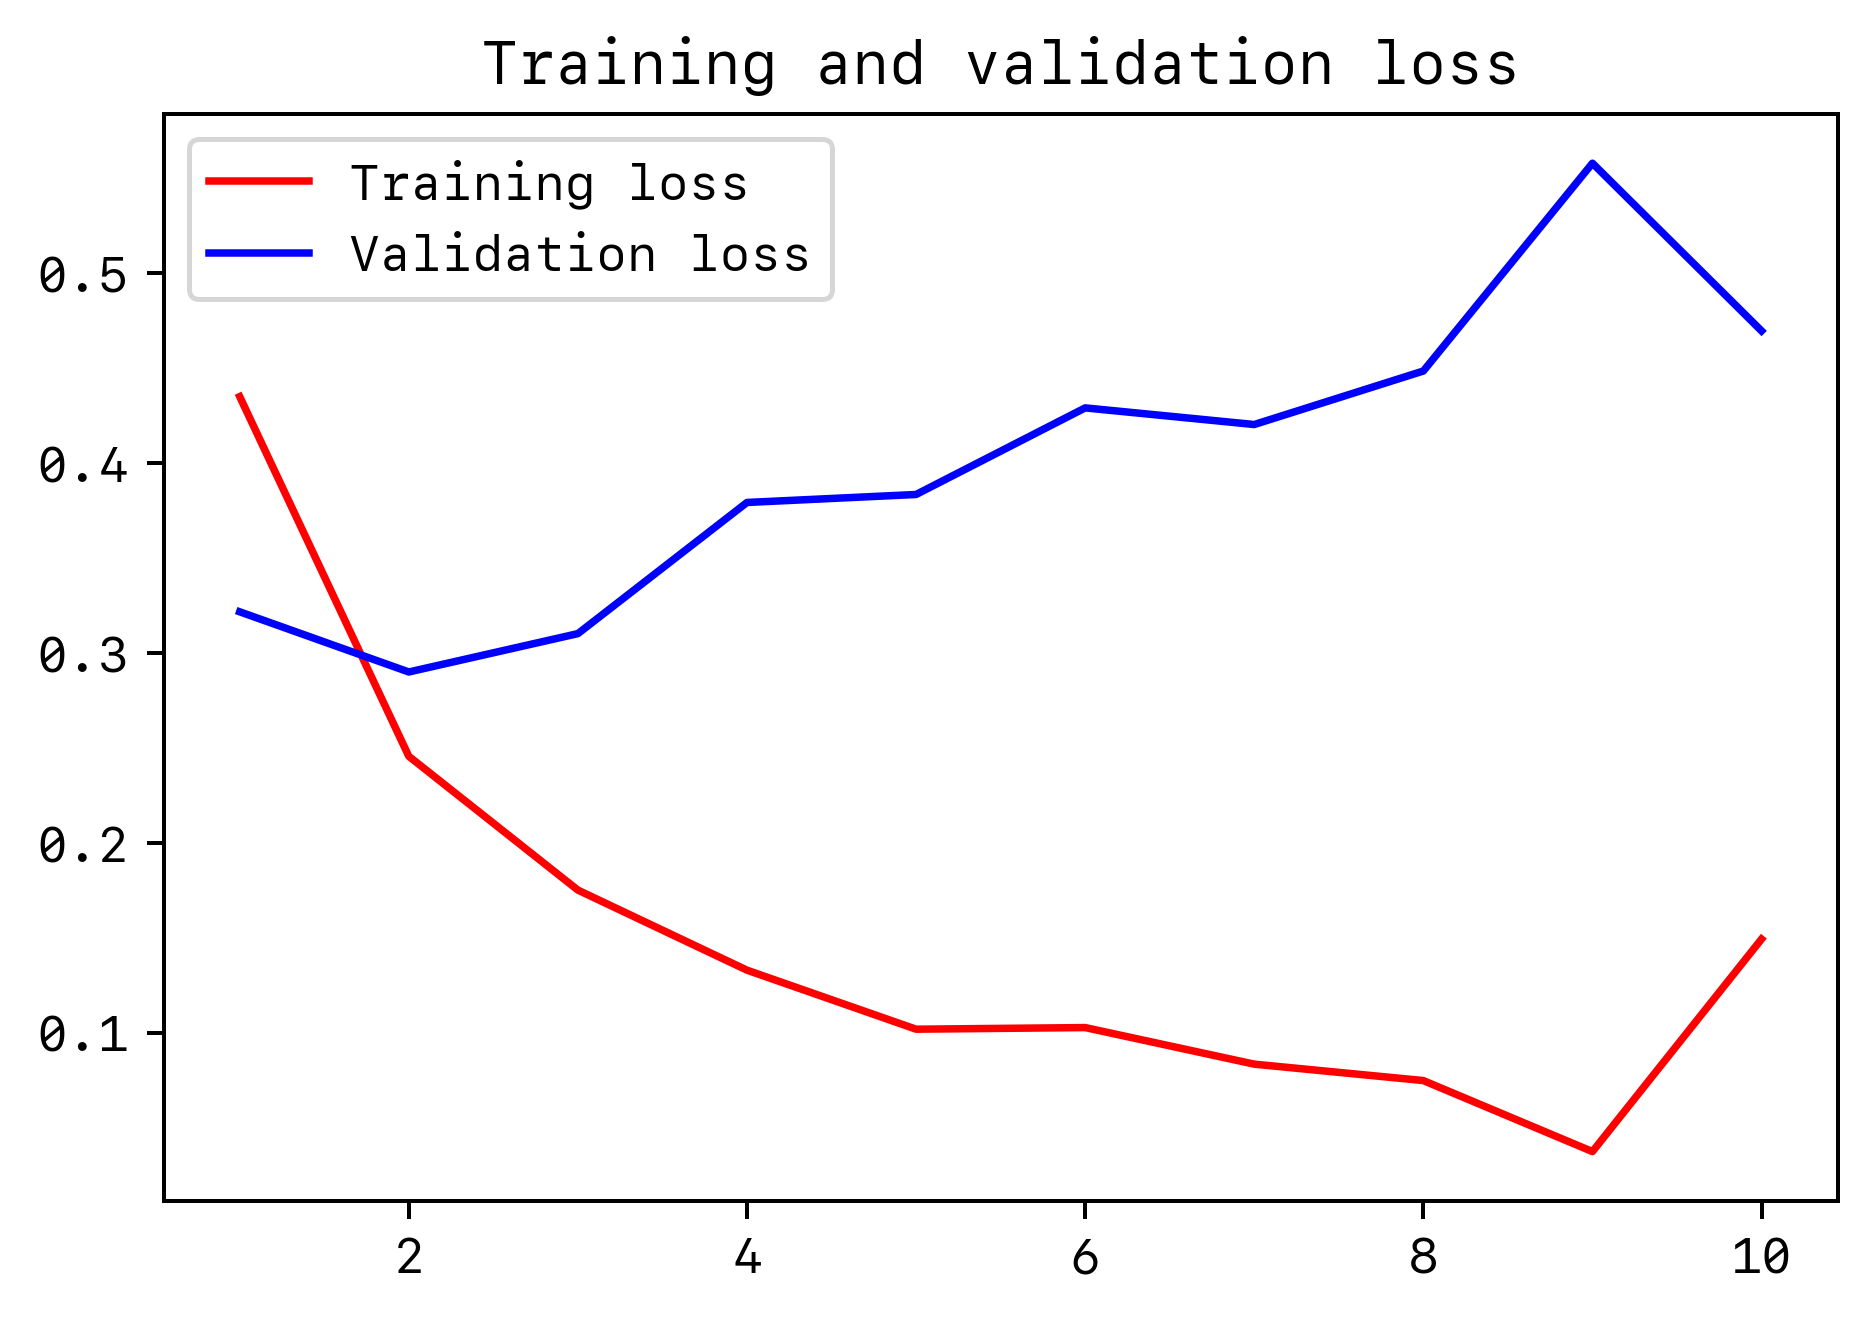

In [9]:
draw_history(history)